### ZAD 2 Kompresja Obrazu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

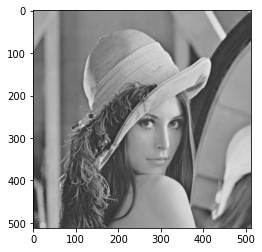

In [2]:
image = Image.open("Lenna_Gray.png")
plt.imshow(image)

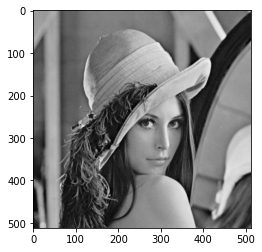

In [3]:
im_arr = np.array(image.getdata(band = 0), float)
im_arr.shape = (image.size[1], image.size[0])
im_arr = np.matrix(im_arr)
plt.imshow(im_arr, cmap='gray')

In [4]:
u, sig, v = np.linalg.svd(im_arr)

In [5]:
def low_rank_approx(U, sig, V, k, original):
    f, axarr = plt.subplots(1,2)
    image = np.matrix(U[:, :k]) * np.diag(sig[:k]) * np.matrix(V[:k, :])
    axarr[0].imshow(image, cmap = 'gray')
    axarr[1].imshow(original, cmap = 'gray')
    plt.show()
    diff = original - image
    diff = np.sum(np.abs(diff))
    print(diff)
    return diff
        

In [6]:
x = []
y = []

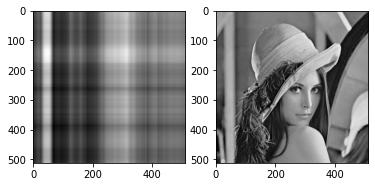

7902125.505804136


In [7]:
x.append(1)
y.append(low_rank_approx(u, sig, v, 1, im_arr))

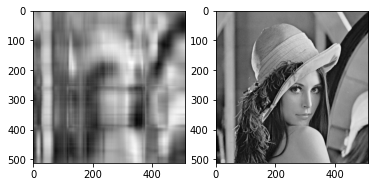

4732165.290929852


In [8]:
x.append(5)
y.append(low_rank_approx(u, sig, v, 5, im_arr))

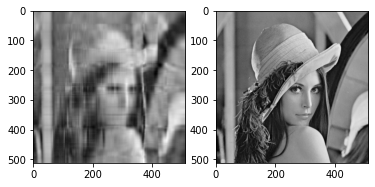

3176100.325734141


In [9]:
x.append(10)
y.append(low_rank_approx(u, sig, v, 10, im_arr))

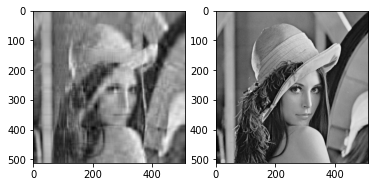

2657523.4665151644


In [10]:
x.append(15)
y.append(low_rank_approx(u, sig, v, 15, im_arr))

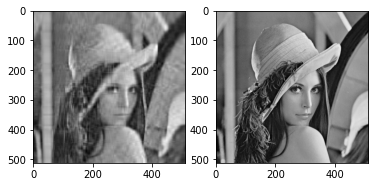

2237499.0382599444


In [11]:
x.append(20)
y.append(low_rank_approx(u, sig, v, 20, im_arr))

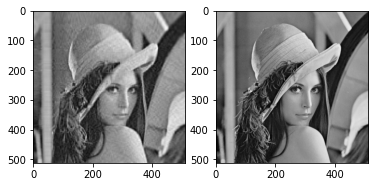

1498260.5114484688


In [12]:
x.append(40)
y.append(low_rank_approx(u, sig, v, 40, im_arr))

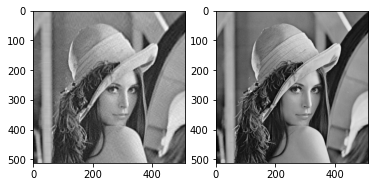

1120235.8635540807


In [13]:
x.append(60)
y.append(low_rank_approx(u, sig, v, 60, im_arr))

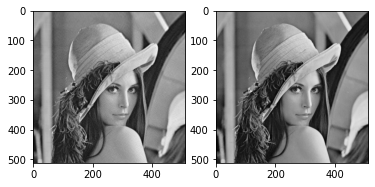

703489.8995413681


In [14]:
x.append(100)
y.append(low_rank_approx(u, sig, v, 100, im_arr))

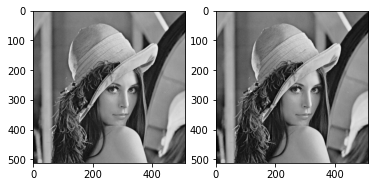

296543.6812037931


In [15]:
x.append(200)
y.append(low_rank_approx(u, sig, v, 200, im_arr))

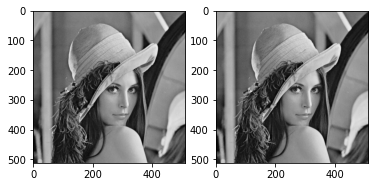

48090.959853368295


In [16]:
x.append(400)
y.append(low_rank_approx(u, sig, v, 400, im_arr))

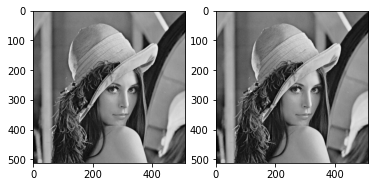

5.026573290933811e-08


In [17]:
x.append(512)
y.append(low_rank_approx(u, sig, v, 512, im_arr))

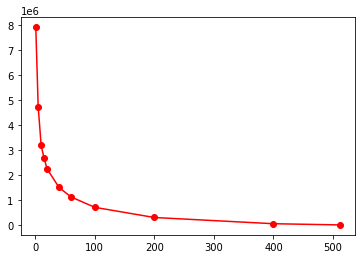

In [18]:
plt.plot(x, y, 'ro-')

### Wnioski
Kompresja obrazów nie jest bez stratna jednag przy duzych wartosciech k zblizajacych sie do wymiaru obrazu, różnica zbliża się do zera, przy wartości k = wymiar obrazu ( w tym przypadku 512 ), wyniosła ona 5.026573290933811e-08, wiec jest to wartość znikoma, a różnice dla oka stają się niemal niezauważalne dla k = 60)

### ZAD 1 

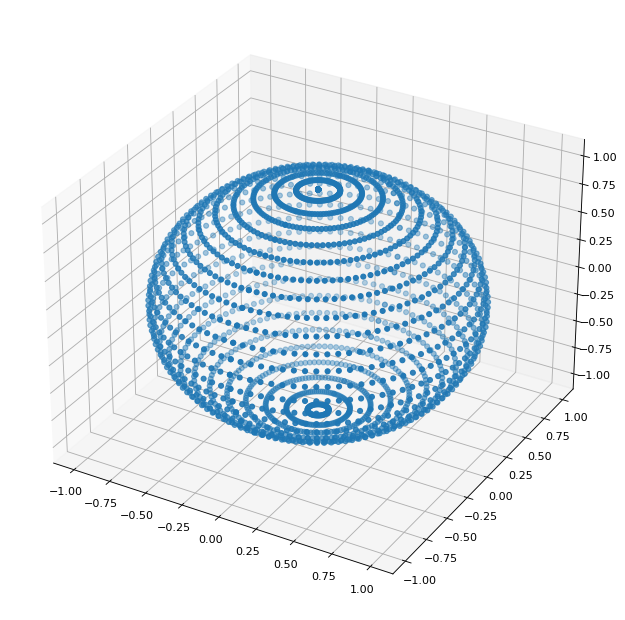

In [19]:
N = 50
s = np.linspace(0, 2*np.pi, N)
t = np.linspace(0, np.pi, N)

x = np.outer(np.sin(s), np.sin(t))
y = np.outer(np.sin(s), np.cos(t))
z = np.outer(np.cos(s), np.ones_like(t))


fig = plt.figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')

ax.scatter(x, y, z)

In [20]:
def sphere2elip(A, x, y, z):
    v = np.array([x.flatten(), y.flatten(), z.flatten()])
    
    elip = A@v
    u, sig, v = np.linalg.svd(elip)
    el_x = elip[0]
    el_y = elip[1]
    el_z = elip[2]

    fig = plt.figure(figsize=(10,10), dpi=80)
    ax = plt.axes(projection='3d')

    ax.scatter(el_x, el_y, el_z)
    return (u, sig, v)

In [21]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

In [22]:
res = []

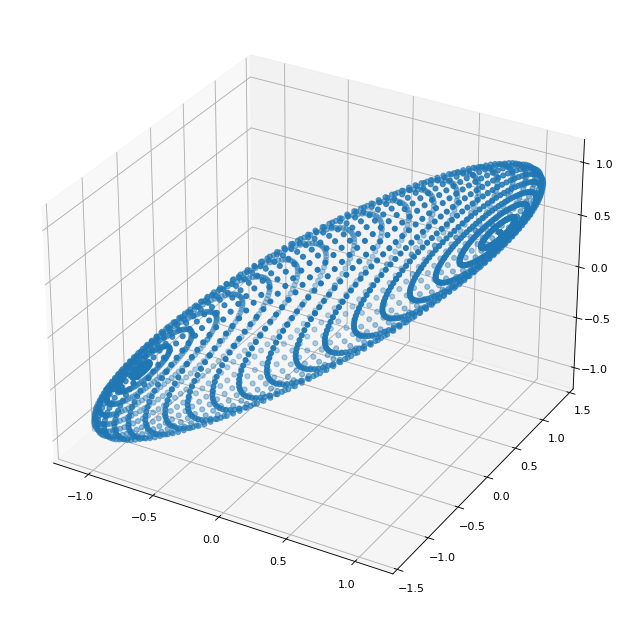

In [23]:
res.append(sphere2elip(A1, x, y, z))

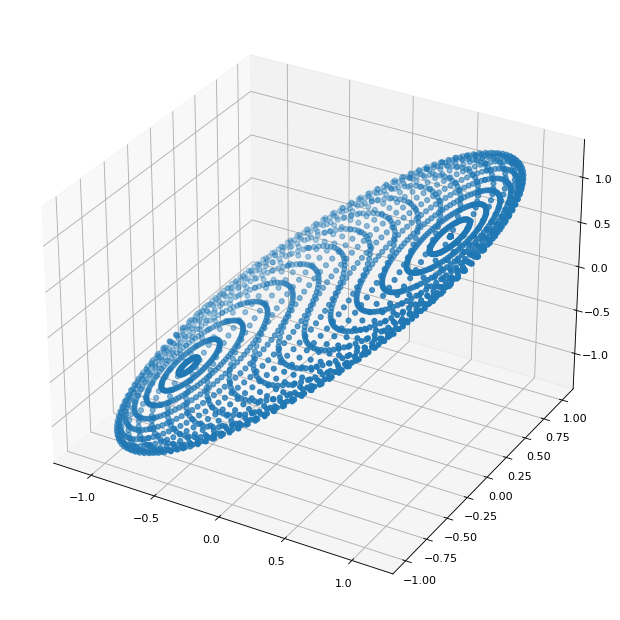

In [24]:
res.append(sphere2elip(A2, x, y, z))

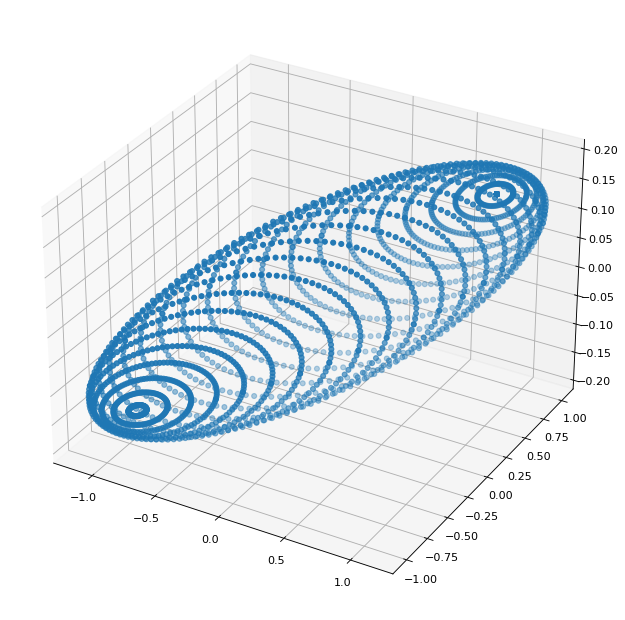

In [25]:
res.append(sphere2elip(A3, x, y, z))

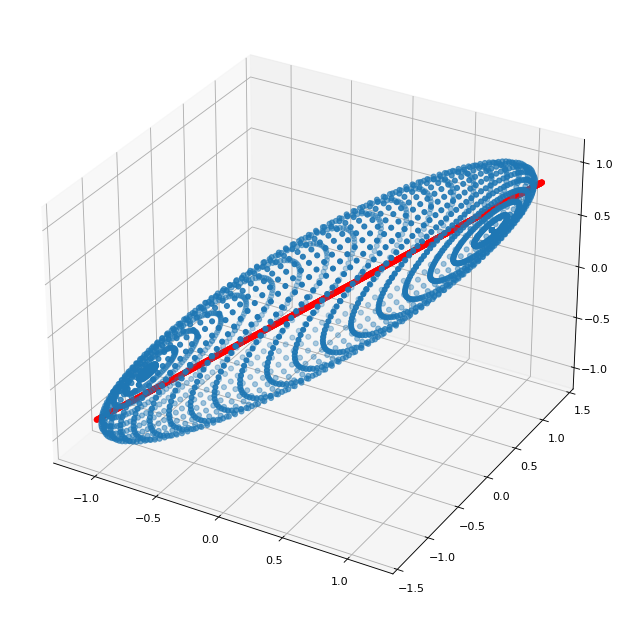

In [26]:
k = 1
tmp = np.matrix(res[0][0][:, :k])*np.diag(res[0][1][:k])*np.matrix(res[0][2][:k, :])
sp_x = tmp[0]
sp_y = tmp[1]
sp_z = tmp[2]

fig = plt.figure(figsize=(10,10), dpi=80)
ax = plt.axes(projection='3d')

ax.scatter(sp_x, sp_y, sp_z, color='r')

v = np.array([x.flatten(), y.flatten(), z.flatten()])

elip = A1@v
u, sig, v = np.linalg.svd(elip)
el_x = elip[0]
el_y = elip[1]
el_z = elip[2]

ax.scatter(el_x, el_y, el_z)

plt.show()

In [27]:
A4 = np.random.rand(3,3)
A4[2] *= 100
A4

array([[ 0.31114394,  0.41742395,  0.89033214],
       [ 0.70619331,  0.85914228,  0.73915378],
       [21.75741996, 24.54963296, 80.17339133]])

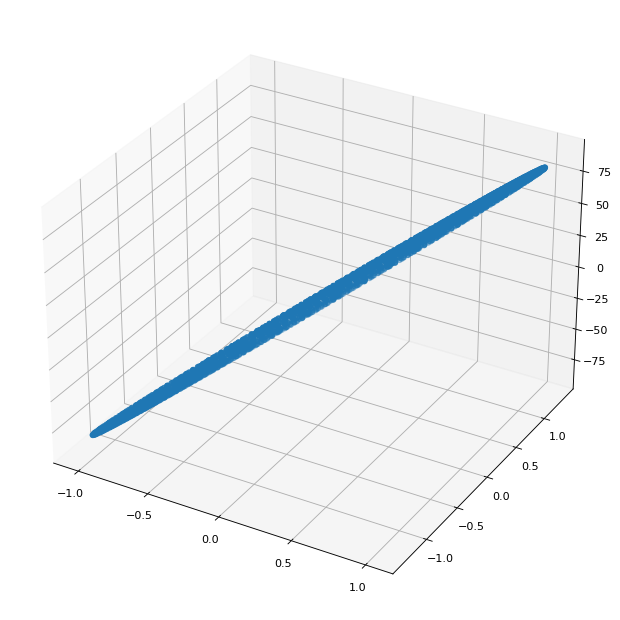

In [28]:
res.append(sphere2elip(A4, x, y, z))